# Прогноз необходимого числа набюдений эксперимента

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Текущий уровень конверсии: 1%
# Минимальный уровень изменений: +0.1%
# Уровень значимости: 95%
# Требуемая мощность критерия: 90%

In [60]:
DIFF = 0.01
Q = 0.95
p = 0.01
n = 90

In [61]:
STD = np.sqrt(p*(1-p)/n)

In [62]:
z = st.norm.ppf(Q)

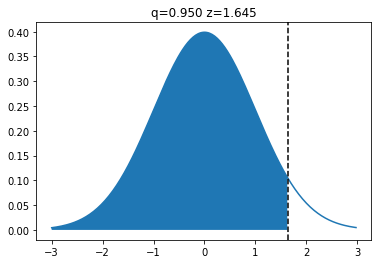

In [63]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('q=%.3f z=%.3f' % (Q, z));

In [64]:
n = (STD / (DIFF/z))**2

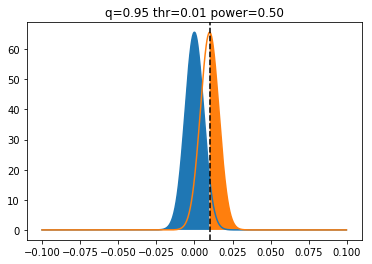

In [67]:
se = STD / np.sqrt(n)
thr = st.norm.ppf(Q, 0, se)

betta = st.norm.cdf(thr, DIFF, se)
power = 1 - betta  # доля верно отклоненных нулевых гипотез

x = np.arange(-0.1, 0.1, 0.00025)
plt.plot(x, st.norm.pdf(x, 0, se))
plt.plot(x, st.norm.pdf(x, DIFF, se))
plt.axvline(thr, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x, 0, se), where=x<thr)
plt.fill_between(x, st.norm.pdf(x, DIFF, se), where=x>thr)
plt.title('q=%.2f thr=%.2f power=%.2f' % (Q, thr, power));